In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib


from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.ensemble import GradientBoostingClassifier
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import plotly.express as px
import nltk
#import sys
#import re



In [ ]:
#!unzip dataset.zip

Archive:  dataset.zip
replace dataset/source_data/lm/lm.2gram.slm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv(r'/content/dataset/twitter_dataset/TurkishTweets.csv')
df

,Tweet,Etiket
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın
...,...,...
3995,Aynı şeyleri yapmaktan sıkıldım,üzgün
3996,"Olacağı varsa oluyor ya hani, biteceği varsa d...",üzgün
3997,Çok şey istiyorum ama sonu hep fiyasko MUTSUZUM,üzgün
3998,Garip bir şekilde canım çok yanıyor moralim bozuk,üzgün


In [ ]:
# İlk veri setini inceleyelim.
df.head()

,Tweet,Etiket
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın


In [ ]:
df.shape

(4000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   3999 non-null   object
 1   Etiket  4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

Tweet     1
Etiket    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Tweet     0
Etiket    0
dtype: int64

In [ ]:
df.nunique()

Tweet     3929
Etiket       5
dtype: int64

In [ ]:
df['Etiket'].unique()

array(['kızgın', 'korku', 'mutlu', 'surpriz', 'üzgün'], dtype=object)

In [ ]:
df["Etiket"].replace({"kızgın": "Negatif", "korku": "Negatif", "üzgün": "Negatif",
                      "mutlu": "Pozitif", "surpriz": "Pozitif"}, inplace=True)

<ipython-input-13-68c05010bc89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Etiket"].replace({"kızgın": "Negatif", "korku": "Negatif", "üzgün": "Negatif",


In [ ]:
df['Etiket'].unique()

array(['Negatif', 'Pozitif'], dtype=object)

In [ ]:
df.columns = ['Tweetler', 'Duygu Analizi']
df.head(5)

,Tweetler,Duygu Analizi
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,Negatif
1,site ne zaman çalıştıda ürün stokları bitti di...,Negatif
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,Negatif
3,Black friday ne amk bu yıl çıkardınız bu bokud...,Negatif
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,Negatif


In [ ]:
df

,Tweetler,Duygu Analizi
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,Negatif
1,site ne zaman çalıştıda ürün stokları bitti di...,Negatif
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,Negatif
3,Black friday ne amk bu yıl çıkardınız bu bokud...,Negatif
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,Negatif
...,...,...
3995,Aynı şeyleri yapmaktan sıkıldım,Negatif
3996,"Olacağı varsa oluyor ya hani, biteceği varsa d...",Negatif
3997,Çok şey istiyorum ama sonu hep fiyasko MUTSUZUM,Negatif
3998,Garip bir şekilde canım çok yanıyor moralim bozuk,Negatif


In [ ]:
# Benzer temel analizleri 2. birleştireceğim  veri seti içinde yapalim
df1 = pd.read_csv(r'/content/dataset/twitter_dataset/tweetset.csv', encoding='windows-1254')
df1

,Tip,Paylaşım,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Negatif,Doğa ağzımıza sıçsa hakkı var,NaN,NaN,NaN,NaN
1,Pozitif,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",NaN,NaN,NaN,NaN
2,Negatif,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,NaN,NaN,NaN,NaN
3,Negatif,Köpeğim suratına sıçsın senin namussuz karı,NaN,NaN,NaN,NaN
4,Negatif,"Ben söğüşledim, birazda sen söğüşle",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11106,Negatif,eğer gidip bir aynaya bakarsanız orada en büyü...,NaN,NaN,NaN,NaN
11107,Negatif,Asıl fahişe senin beynin,NaN,NaN,NaN,NaN
11108,Negatif,Sorsak bir numaralı müslümandır sıfatsız herif,NaN,NaN,NaN,NaN
11109,Negatif,surata bak lenetlenmiş oç,NaN,NaN,NaN,NaN


In [ ]:
df1.head()

,Tip,Paylaşım,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Negatif,Doğa ağzımıza sıçsa hakkı var,NaN,NaN,NaN,NaN
1,Pozitif,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",NaN,NaN,NaN,NaN
2,Negatif,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,NaN,NaN,NaN,NaN
3,Negatif,Köpeğim suratına sıçsın senin namussuz karı,NaN,NaN,NaN,NaN
4,Negatif,"Ben söğüşledim, birazda sen söğüşle",NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(11111, 6)

In [ ]:
df1.isnull().sum()

Tip               0
Paylaşım          0
Unnamed: 2    11109
Unnamed: 3    11111
Unnamed: 4    11110
Unnamed: 5    11110
dtype: int64

In [ ]:
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tip       11111 non-null  object
 1   Paylaşım  11111 non-null  object
dtypes: object(2)
memory usage: 173.7+ KB


In [ ]:
columnNameUnique= df1.nunique()
uniqueColumnNames = columnNameUnique.index.tolist()
print(uniqueColumnNames)

['Tip', 'Paylaşım']


In [ ]:
df1 = df1.reindex(columns=['Paylaşım','Tip'])
df1.head()

,Paylaşım,Tip
0,Doğa ağzımıza sıçsa hakkı var,Negatif
1,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",Pozitif
2,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,Negatif
3,Köpeğim suratına sıçsın senin namussuz karı,Negatif
4,"Ben söğüşledim, birazda sen söğüşle",Negatif


In [ ]:
df1.columns = ['Tweetler','Duygu Analizi']
df1.head(5)

,Tweetler,Duygu Analizi
0,Doğa ağzımıza sıçsa hakkı var,Negatif
1,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",Pozitif
2,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,Negatif
3,Köpeğim suratına sıçsın senin namussuz karı,Negatif
4,"Ben söğüşledim, birazda sen söğüşle",Negatif


In [ ]:
df1.isnull().sum()

Tweetler         0
Duygu Analizi    0
dtype: int64

In [ ]:
df = pd.concat([df, df1], ignore_index=True)
df.head()

,Tweetler,Duygu Analizi
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,Negatif
1,site ne zaman çalıştıda ürün stokları bitti di...,Negatif
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,Negatif
3,Black friday ne amk bu yıl çıkardınız bu bokud...,Negatif
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,Negatif


In [ ]:
unique_values = df.groupby('Duygu Analizi').nunique()
unique_values

,Tweetler
Duygu Analizi,
Negatif,1
Negatif,7324
Pozitif,7659


In [ ]:
# Tek olan değerleri bulun
single_occurrence_values = unique_values[unique_values['Tweetler'] == 1].index
single_occurrence_values

Index([' Negatif'], dtype='object', name='Duygu Analizi')

In [ ]:
df['Duygu Analizi'] = df['Duygu Analizi'].replace(' Negatif', 'Negatif')

In [ ]:
unique_values

,Tweetler
Duygu Analizi,
Negatif,1
Negatif,7324
Pozitif,7659


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweetler       15110 non-null  object
 1   Duygu Analizi  15110 non-null  object
dtypes: object(2)
memory usage: 236.2+ KB


In [ ]:
df.shape

(15110, 2)

In [ ]:
# Text Preprocessing -- Normalization

In [ ]:
# 1. Lowercase
# 2. Numerik Karakterler
# 3. Noktalama
# 4.  html ve @
# 5. http
!pip install unicode_tr #  https://github.com/emre/unicode_tr
import re
from unicode_tr import unicode_tr
df['Tweetler'] = df['Tweetler'].apply(lambda x: unicode_tr(x).lower())
df.head(5)

  Preparing metadata (setup.py) ... done
  Created wheel for unicode_tr: filename=unicode_tr-0.6.1-py3-none-any.whl size=2056 sha256=1ae878a85f2bb4dd470f013a7a6559bb68d7d13c162d1d07897b546ce7fd6ef4
  Stored in directory: /root/.cache/pip/wheels/83/32/76/56d5064754ac8ea8d2be537c7e7e0ab56f7a9a4586b22a8b7b
Successfully built unicode_tr


,Tweetler,Duygu Analizi
0,allah'ım çıldıracağım. yemin ederim çıldıracağ...,Negatif
1,site ne zaman çalıştıda ürün stokları bitti di...,Negatif
2,sebebi neydi ki diye bağıracağım şimdi az kaldı,Negatif
3,black friday ne amk bu yıl çıkardınız bu bokud...,Negatif
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,Negatif


In [ ]:
mentions_mask = df['Tweetler'].apply(lambda x: bool(re.search(r'@[A-Za-z0-9]+', str(x))))
df[mentions_mask]

,Tweetler,Duygu Analizi
4698,"7,@dogashn1 @isfromatilda @survivordiyal0g ezi...",Negatif
5229,türkiye geneli üniversiteler arası nadir hasta...,Pozitif


In [ ]:
df['Tweetler'] = df['Tweetler'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+', '', str(x)))

In [ ]:
mentions_mask = df['Tweetler'].apply(lambda x: bool(re.search(r'@[A-Za-z0-9]+', str(x))))
df[mentions_mask]

,Tweetler,Duygu Analizi


In [ ]:
hyperlinks_mask = df['Tweetler'].apply(lambda x: bool(re.search(r'http\S+|www\S+', str(x))))
df[hyperlinks_mask]

,Tweetler,Duygu Analizi
4914,"61,hazine ve maliye bakanı #beratalbayrak'ın ş...",Pozitif
7910,kliplerin mega amatör olduğu güzide müzik sekt...,Pozitif
8243,biz türk milleti olarak çok garibiz ne bileyim...,Pozitif
8960,ben 2 milyon yıldır izmir de yaşıyorum ya siz ...,Pozitif
9430,esnaf kardeşlerimizi ziyaretteyiz hayırlı işle...,Pozitif
9882,bundan sonra senin adın amına koyduğum kazması...,Negatif
10364,ibadetin yolu açıldı https t co pftpwh s,Pozitif
10665,albüm notlarını nasıl okuyabilirim ly her tea...,Pozitif
11117,önce haram deyip sonra amını götünü veren lise...,Negatif
11819,can dostunuz için adım adım köpek kulübesi yap...,Pozitif


In [ ]:
df['Tweetler'] = df['Tweetler'].apply(lambda x: re.sub(r'http\S+|www\S+', '', str(x)))

In [ ]:
hyperlinks_mask = df['Tweetler'].apply(lambda x: bool(re.search(r'http\S+|www\S+', str(x))))
df[hyperlinks_mask]

,Tweetler,Duygu Analizi


In [ ]:
df['Tweetler'] = df['Tweetler'].apply(lambda x: ''.join([char for char in x if not char.isdigit()]))

In [ ]:
df['Tweetler'] = df['Tweetler'].apply(lambda x: ''.join(char for char in x if char not in '''!()-[]{};:'"\,<>./?@#$%^&*_~'''))

In [ ]:
zann = df['Tweetler'].apply(lambda x: bool(re.search(r'\[', str(x))))
df[zann]

,Tweetler,Duygu Analizi


In [ ]:
df['Tweetler']

0        allahım çıldıracağım yemin ederim çıldıracağım...
1        site ne zaman çalıştıda ürün stokları bitti di...
2          sebebi neydi ki diye bağıracağım şimdi az kaldı
3        black friday ne amk bu yıl çıkardınız bu bokud...
4        kısa kısa cevaplar vericeksen niye yazıyorsun ...
                               ...                        
15105    eğer gidip bir aynaya bakarsanız orada en büyü...
15106                             asıl fahişe senin beynin
15107       sorsak bir numaralı müslümandır sıfatsız herif
15108                            surata bak lenetlenmiş oç
15109    allah’ ın din tüccarları sizi bir insana iftir...
Name: Tweetler, Length: 15110, dtype: object

In [ ]:
# Zemberek
# Zemberek kütüphanesinin morphology islemlerini gerçekleştiren
# zeyrek kütüphanesini colabda dökümantasyonda yazana göre birebir test ettiğimde
# warning hatası aldım. Bundan dolayı araştırdığımda Zemberek kütüphanesinin
# javada yazılmış olduğunu, java ile python arasında JPype adlı bir modül ile
# bağlantı kurararak zembereği kullanabileceğimi gördüm. --> https://jpype.readthedocs.io/en/latest/
!pip install JPype1
# Zemberek'i kullanabillmek için ilk önce java kütüphenelerini kullanmamızı sağlayan kütüphaneyi ekleyelim
import jpype as jp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Zembrek'in jar dosyalarını okuyalım ve hangi modüller var bakalım
import zipfile

def read_jar(jar_file_path):
    zf = zipfile.ZipFile(jar_file_path, 'r')
    try:
        module_list = []
        for zi in zf.infolist():
            fn = zi.filename
            module_list.append(fn)

        return module_list
    finally:
        zf.close()


# Dosyanın adını buraya yazın
jar_filename = "/content/dataset/zemberek-full/zemberek-full.jar"

# JAR dosyasını okuma
modules = read_jar(jar_filename)

# Modülleri yazdırma
#print("Modüller:")
#for module in modules:
#    print(module)

In [ ]:
# Zembrek'i çalıştıralım
ZEMBEREK_PATH = r'/content/dataset/zemberek-full/zemberek-full.jar'
jp.startJVM(jp.getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))

In [ ]:
#jp.shutdownJVM()

In [ ]:
# Zemberekten gerekli modülleri import edelim
# https://drive.google.com/drive/folders/1tztjRiUs9BOTH-tb1v7FWyixl-iUpydW
TurkishSentenceNormalizer = jp.JClass('zemberek.normalization.TurkishSentenceNormalizer')
TurkishMorphology = jp.JClass('zemberek.morphology.TurkishMorphology')
TurkishSentenceExtractor = jp.JClass('zemberek.tokenization.TurkishSentenceExtractor')
Paths = jp.JClass('java.nio.file.Paths')
# Get the path to the (baseline) lookup files
lookupRoot = Paths.get('/content/dataset/source_data/normalization')
# Get the path to the compressed bi-gram language model
lmPath = Paths.get('/content/dataset/source_data/lm/lm.2gram.slm')
morphology = TurkishMorphology.createWithDefaults()
extractor = TurkishSentenceExtractor.DEFAULT
normalizer = TurkishSentenceNormalizer(morphology, lookupRoot, lmPath)

In [ ]:
print(normalizer.normalize('yrn okua gidicem'))

yarın okula gideceğim


In [ ]:
# Noisy Text Normalization -->  more info you can go https://github.com/ahmetaa/zemberek-nlp/tree/master/normalization
# normalizer.normalize work with Strings. Because of this ı convert series to str
from nltk.tokenize import WhitespaceTokenizer
def noisyTextNormalization(text):
   return [str(normalizer.normalize(w)) for w in WhitespaceTokenizer().tokenize(text)]


#df["Tweetlerr"] = df["Tweetler"].apply(lambda x : ' '.join([word for word in noisyTextNormalization]))
df["Tweetler"] = df["Tweetler"].apply(lambda x: ' '.join(noisyTextNormalization(x)))

In [ ]:
df['Tweetler']

0        allahım çıldıracağım yemin ederim çıldıracağım...
1        site ne zaman çalıştı da ürün stokları bitti d...
2          sebebi neydi ki diye bağıracağım şimdi az kaldı
3        black friday ne amk bu yıl çıkardınız bu boku ...
4        kısa kısa cevaplar vereceksen niye yazıyorsun ...
                               ...                        
15105    eğer gidip bir aynaya bakarsanız orada en büyü...
15106                             asıl fahişe senin beynin
15107       sorsak bir numaralı müslümandır sıfatsız herif
15108                            surata bak lanetlenmiş öç
15109    allah ’ in din tüccarları size bir insana ifti...
Name: Tweetler, Length: 15110, dtype: object

In [ ]:
df["Tweetler"][15:25]

15    bir kitaba tl verdiğim için gerizekalı diyen k...
16    lan ölüm lan ne gerizekalısınız lan yine sinir...
17    nerede lan benim çikolatalı sütüm bak sinirlendim
18    size zerre umursamayan insanlar için deli gibi...
19    kendimi karşıma alıp konuşmak istiyorum bak ge...
20    yarın sabah uyumadığım her dakika için kendime...
21    ben takip atıyorum siz gt atmıyorsunuz ve ben ...
22    allah belanı versin tudor cehennemde yan nerde...
23             lan padişah diye bağırıyor gerizekalılar
24                 susmasam kendisi şeşimde delireceğim
Name: Tweetler, dtype: object

In [ ]:
df['Tweetler'][4]

'kısa kısa cevaplar vereceksen niye yazıyorsun gerizekalı'

In [ ]:
def remove_stop_words(sentences, stop_words_file):
    with open(stop_words_file, "r", encoding="utf-8") as file:
        stop_words = file.read().lower().split()

    filtered_sentences = []
    for sentence in sentences:
        words = sentence.lower().split()
        filtered_words = [word for word in words if word not in stop_words]
        filtered_text = ' '.join(filtered_words)
        filtered_sentences.append(filtered_text)

    # Birleştirme işlemi
    result = ' '.join(filtered_sentences)
    return result

In [ ]:
stopWordsPath = '/content/dataset/stop-words.tr.txt'
df["Tweetler"] = df["Tweetler"].apply(lambda x : remove_stop_words(noisyTextNormalization(x), stopWordsPath))

In [ ]:
df["Tweetler"]

0        allahım çıldıracağım yemin ederim çıldıracağım...
1        site  zaman çalıştı  ürün stokları bitti diyor...
2                       sebebi neydi   bağıracağım   kaldı
3        black friday  amk  yıl çıkardınız  boku  mal m...
4               cevaplar vereceksen  yazıyorsun gerizekalı
                               ...                        
15105     gidip  aynaya bakarsanız   büyük fahişeyi gör...
15106                                  fahişe senin beynin
15107          sorsak  numaralı müslümandır sıfatsız herif
15108                            surata bak lanetlenmiş öç
15109    allah ’ in din tüccarları size  insana iftira ...
Name: Tweetler, Length: 15110, dtype: object

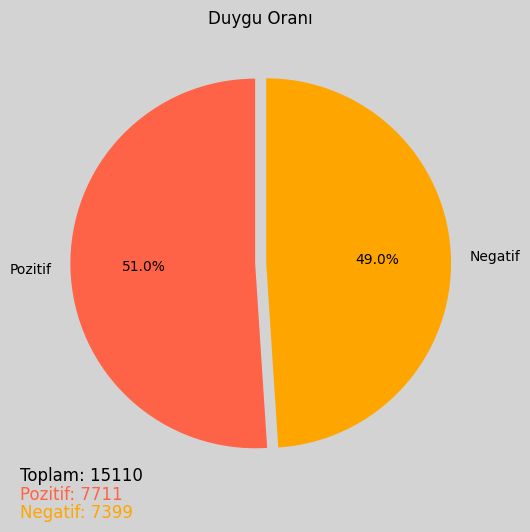

In [ ]:
import matplotlib.pyplot as plt


pozitifKelimeler = df[df['Duygu Analizi'] == 'Pozitif']
negatifKelimeler = df[df['Duygu Analizi'] == 'Negatif']

toplam_sayi = len(df)
pozitif_sayisi = len(pozitifKelimeler)
negatif_sayisi = len(negatifKelimeler)
x = [pozitif_sayisi, negatif_sayisi]
labels = ['Pozitif', 'Negatif']

plt.figure(figsize=(6, 6), facecolor='lightgray')
ax = plt.pie(x=x, labels=labels, autopct='%1.1f%%', explode=[0.03, 0.03], startangle=90, colors=['tomato', 'orange'])

plt.text(-1.3, -1.2, f'Toplam: {toplam_sayi}', ha='left', va='bottom', fontsize=12)
plt.text(-1.3, -1.3, f'Pozitif: {pozitif_sayisi}', ha='left', va='bottom', fontsize=12, color='tomato')
plt.text(-1.3, -1.4, f'Negatif: {negatif_sayisi}', ha='left', va='bottom', fontsize=12, color='orange')

plt.title('Duygu Oranı')
plt.show()

In [ ]:
# Bir dataframein tüm verileri üzerinde yapılan Sık kelime kullanımı analizi
top = Counter(' '.join(df['Tweetler']).split())
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,var,746
2,olsun,507
3,senin,478
4,şey,410
5,allah,400
6,orospu,320
7,benim,290
8,amk,288
9,beni,284
10,adam,281


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
pozitifWord = df[df['Duygu Analizi'] == 'Pozitif']['Tweetler']
top = Counter(' '.join(pozitifWord).split())
temp = pd.DataFrame(top.most_common(33))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,var,388
2,olsun,333
3,şey,244
4,allah,219
5,benim,183
6,mutluyum,180
7,gün,169
8,adam,148
9,bana,146
10,insan,144


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
# Negatif Tweetler Üzerinde Yapılan Görselleştirme İşlemler
pozitifWord = df[df['Duygu Analizi'] == 'Negatif']['Tweetler']
top = Counter(' '.join(pozitifWord).split())
temp = pd.DataFrame(top.most_common(33))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
1,senin,401
2,var,358
3,orospu,316
4,amk,271
5,sikim,234
6,allah,181
7,olsun,174
8,çocuğu,173
9,bak,170
10,sikeyim,167


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
# Visualizing N- Grams

# Top Bigrams
# Unigram zaten bir nevi üstte yapıldı.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
def bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topBigrams = bigram(df['Tweetler'], 25)


temp = pd.DataFrame(topBigrams, columns=['Bigram', 'Count'])
temp = temp.sort_values(by='Count', ascending=True)
fig = px.bar(temp, x='Count', y='Bigram', title='Top 25 Bigrams', orientation='h',
             width=700, height=700, color='Count')
fig.show()

In [ ]:
# Top Trigrams
def trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topTrigram = trigram(df['Tweetler'], 25)

temp = pd.DataFrame(topTrigram, columns=['Trigram', 'Count'])
temp = temp.sort_values(by='Count', ascending=True)
fig = px.bar(temp, x='Count', y='Trigram', title='Top 25 Trigrams', orientation='h',
             width=700, height=700, color='Count')
fig.show()

In [ ]:
# 4  - Grams
def fourGram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4, 4)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


topFourGram = fourGram(df['Tweetler'], 25)

temp = pd.DataFrame(topFourGram, columns=['4-gram', 'Count'])
temp = temp.sort_values(by='Count', ascending=True)
fig = px.bar(temp, x='Count', y='4-gram', title='Top 25 4-grams', orientation='h',
             width=700, height=700, color='Count')
fig.show()

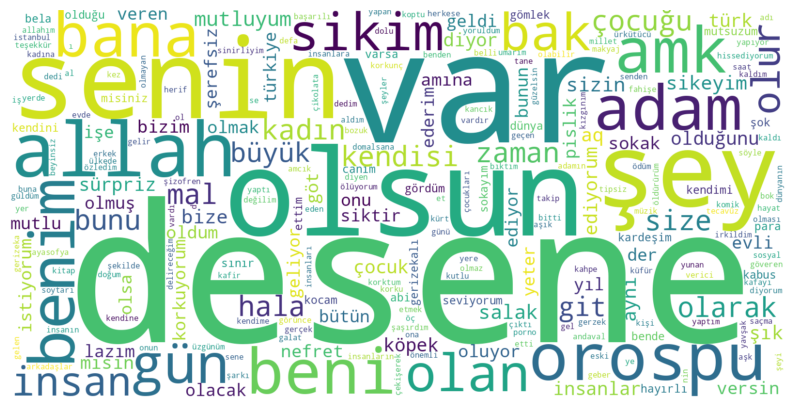

In [ ]:
# Bütün twittlerin wordcloudu
twittler = " ".join(df['Tweetler'])

# WordCloud oluştur
plt.figure(figsize=(10, 10))
twitterWordCloud = WordCloud(max_words=250, width=1600, height=800, background_color='white', colormap='viridis',
               contour_color='steelblue', collocations=False).generate(twittler)

# Görselleştirmeyi yap
plt.imshow(twitterWordCloud, interpolation='bilinear')
plt.axis("off")  # Eksenleri kapat
plt.show()

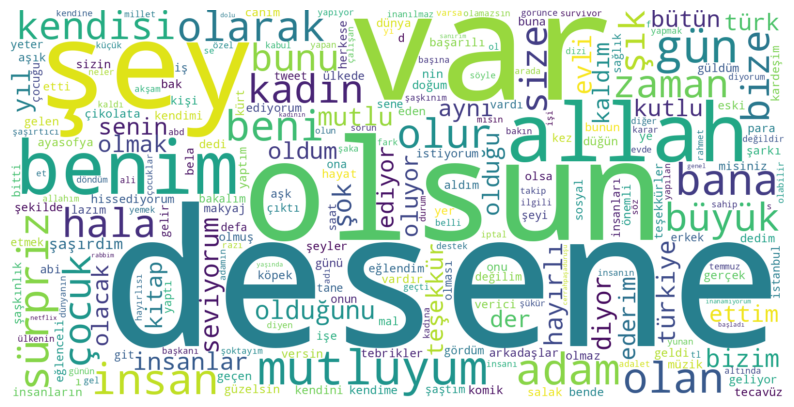

In [ ]:
# Pozitif Tweetlerin Wordcloudu pozitifKelimeler

pozitifTweetler = " ".join(df[df['Duygu Analizi'] == 'Pozitif']['Tweetler'])

plt.figure(figsize=(10, 10))
pozitifTwitterWordCloud = WordCloud(max_words=250, width=1600, height=800, background_color='white', colormap='viridis',
               contour_color='steelblue', collocations=False).generate(pozitifTweetler)

# Görselleştirmeyi yap
plt.imshow(pozitifTwitterWordCloud, interpolation='bilinear')
plt.axis("off")  # Eksenleri kapat
plt.show()

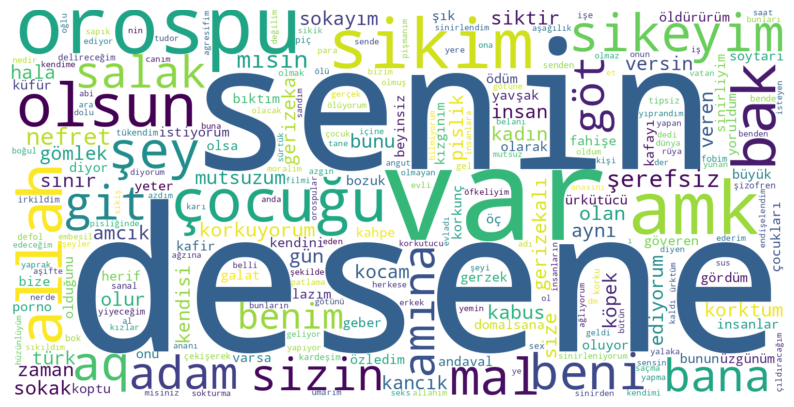

In [ ]:
# Negatif Tweetlerin Wordcloudu

negatifTweetler = " ".join(df[df['Duygu Analizi'] == 'Negatif']['Tweetler'])

plt.figure(figsize=(10, 10))
negatifTwitterWordCloud = WordCloud(max_words=250, width=1600, height=800, background_color='white', colormap='viridis',
               contour_color='steelblue', collocations=False).generate(negatifTweetler)

# Görselleştirmeyi yap
plt.imshow(negatifTwitterWordCloud, interpolation='bilinear')
plt.axis("off")  # Eksenleri kapat
plt.show()

In [ ]:
# Modeller

# Lojistik Regresyon Modeli
X = df['Tweetler']

df['Duygu Analizi'] = np.where(df['Duygu Analizi'] == 'Pozitif', 1, 0)
Y = df['Duygu Analizi']

In [ ]:
df['Duygu Analizi'].value_counts()


1    7711
0    7399
Name: Duygu Analizi, dtype: int64

In [ ]:
# Bert için gerekli dataframein alınması

#df.to_csv('df.csv', index=False)
# from google.colab import files
#files.download('df.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TF-IDF dönüşümü
tfidf_vectorizer = TfidfVectorizer(max_features=17000)  # İsteğe bağlı: max_features ile özellik sayısını sınırlayabilirsiniz
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'max_iter': [17000],  # Sadece 10000 değeriyle denenecek  # Eğitim iterasyon sayısı
}

logreg_model = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(logreg_model, param_grid, cv=10)  # cv: çapraz doğrulama kat sayısı
grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En iyi parametreler:", best_params)

print("En iyi skor:", best_score)


En iyi parametreler: {'C': 10, 'max_iter': 17000}
En iyi skor: 0.8639982827469476


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8600264725347452

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      1517
           1       0.84      0.89      0.86      1505

    accuracy                           0.86      3022
   macro avg       0.86      0.86      0.86      3022
weighted avg       0.86      0.86      0.86      3022



In [ ]:
# Decision Tree Modeli

#X = df['Tweetler']
#df['Duygu Analizi'] = np.where(df['Duygu Analizi'] == 'Pozitif', 1, 0)
#Y = df['Duygu Analizi']

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=1)

#decision_tree_default = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6),
    'random_state': [1]
}

In [ ]:
decision_tree_model_grid = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
decision_tree_model_grid.fit(X_train_tfidf, y_train)

print(f"Best parameters: {decision_tree_model_grid.best_params_}")
print(f"Best score: {decision_tree_model_grid.best_score_}")

Best parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}
Best score: 0.8510916095084685


In [ ]:
best_model = decision_tree_model_grid.best_estimator_

best_model.fit(X_train_tfidf, y_train)

y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8325612177365983

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1517
           1       0.83      0.83      0.83      1505

    accuracy                           0.83      3022
   macro avg       0.83      0.83      0.83      3022
weighted avg       0.83      0.83      0.83      3022



In [ ]:
# Gradient Boosting Modeli
gradient_boosting_model = GradientBoostingClassifier(random_state=1)

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 6],
}

In [ ]:
gradient_boosting_model_grid = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1, error_score='raise')
gradient_boosting_model_grid.fit(X_train_tfidf, y_train)

print(f"Best parameters: {gradient_boosting_model_grid.best_params_}")
print(f"Best score: {gradient_boosting_model_grid.best_score_}")


Best parameters: {'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7747344167126088


In [ ]:
best_model = gradient_boosting_model_grid.best_estimator_

best_model.fit(X_train_tfidf, y_train)

y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.771343481138319

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72      1517
           1       0.70      0.96      0.81      1505

    accuracy                           0.77      3022
   macro avg       0.82      0.77      0.76      3022
weighted avg       0.82      0.77      0.76      3022



In [ ]:
# Random Forest

random_forest_model = RandomForestClassifier(random_state=1)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 6],
}


In [ ]:
random_forest_model_grid = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
random_forest_model_grid.fit(X_train_tfidf, y_train)

print(f"Best parameters: {random_forest_model_grid.best_params_}")
print(f"Best score: {random_forest_model_grid.best_score_}")

Best parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best score: 0.8668093696668177


In [ ]:
#En iyi modeli alın
best_model = random_forest_model_grid.best_estimator_

best_model.fit(X_train_tfidf, y_train)

y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8606882859033752

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1517
           1       0.84      0.89      0.86      1505

    accuracy                           0.86      3022
   macro avg       0.86      0.86      0.86      3022
weighted avg       0.86      0.86      0.86      3022



In [ ]:
# SVM

SVM = SVC()
C = [0.2,1,10,100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
params = {'C':C,'kernel':kernel}

In [ ]:
SVM_grid = GridSearchCV(estimator = SVM,param_grid = params,refit= True,cv=5,verbose = 1,n_jobs=-1)
SVM_grid.fit(X_train_tfidf,y_train)
print(f"best parameters : {SVM_grid.best_params_}")
print(f"best score : {SVM_grid.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best parameters : {'C': 1, 'kernel': 'linear'}
best score : 0.8639140045028443


In [ ]:
best_model = SVM_grid.best_estimator_

best_model.fit(X_train_tfidf, y_train)

y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8636664460622104

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1517
           1       0.84      0.90      0.87      1505

    accuracy                           0.86      3022
   macro avg       0.87      0.86      0.86      3022
weighted avg       0.87      0.86      0.86      3022



In [ ]:
# Turkish Bert Model

!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 97.1 

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
# BERT
from simpletransformers.classification import ClassificationModel
dfBert = pd.read_csv(r'/content/BertDataFrame.csv', encoding='utf-8')

In [ ]:
dfBert.columns = ['text', 'labels']
dfBert

,text,labels
0,allahım çıldıracağım yemin ederim çıldıracağım...,0
1,site zaman çalıştı ürün stokları bitti diyor...,0
2,sebebi neydi bağıracağım kaldı,0
3,black friday amk yıl çıkardınız boku mal m...,0
4,cevaplar vereceksen yazıyorsun gerizekalı,0
...,...,...
15105,gidip aynaya bakarsanız büyük fahişeyi gör...,0
15106,fahişe senin beynin,0
15107,sorsak numaralı müslümandır sıfatsız herif,0
15108,surata bak lanetlenmiş öç,0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dfBert, test_size=0.2, random_state=42)

In [ ]:
train=train[["text","labels"]]
test=test[["text","labels"]]

In [ ]:
train["text"]=train["text"].apply(lambda r: str(r))
train['labels']=train['labels'].astype(int)

In [ ]:
train.shape, test.shape

((12088, 2), (3022, 2))

In [ ]:
model = ClassificationModel('bert', 'dbmdz/bert-base-turkish-uncased', num_labels=2, use_cuda=True,
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3, "train_batch_size": 24 , "fp16":False, "output_dir": "bert_model"})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

In [ ]:
model.train_model(train)

  0%|          | 0/12088 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/504 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/504 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/504 [00:00<?, ?it/s]

(1512, 0.26991386345597523)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test)

  0%|          | 0/3022 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/378 [00:00<?, ?it/s]

In [ ]:
predictions = model_outputs.argmax(axis=1)

In [ ]:
actuals = test.labels.values

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actuals, predictions)

0.8633355393778954

In [ ]:
cumleTahmini = model.predict([bertCumleleri])
if cumleTahmini[0] ==0:
  print("Negatif")
else:
  print("Pozitif")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Negatif


In [ ]:
!pip install SpeechRecognition

# ses kaydından sınıflandırma

import speech_recognition as sr

recognizer = sr.Recognizer()

with sr.AudioFile("/content/savunmad-m.wav") as source:
    recorded_audio = recognizer.listen(source)
    print(".waw uzantılı ses dosyasının yüklenmesi tamamlandı.")

try:
    print("Metni .waw uzantılı ses dosyasından metine çevirme tamamlandı.")
    text = recognizer.recognize_google(
            recorded_audio,
            language='tr-tr'
        )
    model.predict([bertCumleleri])

except Exception as ex:
    print(ex)
sonuc = model.predict([text])


if sonuc[0] ==0:
  print("Negatif")
else:
  print("Pozitif")

Done recording
Recognizing the text


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Negatif
